In [0]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

In [0]:
test_id = pd.read_csv('test_identity.csv', low_memory=False)
train_id =  pd.read_csv('train_identity.csv', low_memory=False)
test_trans = pd.read_csv('test_transaction.csv', low_memory=False)
train_trans =  pd.read_csv('train_transaction.csv', low_memory=False)

In [3]:
print('train identity count',len(train_id))
print('train transaction count',len(train_trans))

train identity count 144233
train transaction count 498275


In [4]:
print('test identity count', len(test_id))
print('test transaction count',len(test_trans))

test identity count 141907
test transaction count 459533


In [5]:
print(train_trans.head())

   TransactionID  isFraud  TransactionDT  ...  V337 V338  V339
0        2987000        0          86400  ...   NaN  NaN   NaN
1        2987001        0          86401  ...   NaN  NaN   NaN
2        2987002        0          86469  ...   NaN  NaN   NaN
3        2987003        0          86499  ...   NaN  NaN   NaN
4        2987004        0          86506  ...   0.0  0.0   0.0

[5 rows x 394 columns]


In [6]:
print(train_id.head())

   TransactionID  id_01  ...  DeviceType                     DeviceInfo
0        2987004    0.0  ...      mobile  SAMSUNG SM-G892A Build/NRD90M
1        2987008   -5.0  ...      mobile                     iOS Device
2        2987010   -5.0  ...     desktop                        Windows
3        2987011   -5.0  ...     desktop                            NaN
4        2987016    0.0  ...     desktop                          MacOS

[5 rows x 41 columns]


In [7]:
print(train_trans.isnull().sum())

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               7289
card3                823
card4                833
card5               3244
card6                828
addr1              56085
addr2              56085
dist1             301433
dist2             465129
P_emaildomain      77783
R_emaildomain     380144
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
                   ...  
V310                  13
V311                  13
V312                  13
V313                1229
V314                1229
V315                1229
V316                  13
V317                  13
V318                  13


In [0]:
train_trans_new=train_trans.iloc[:,0:9]

In [9]:
print(train_trans_new.head())

   TransactionID  isFraud  TransactionDT  ...  card2  card3       card4
0        2987000        0          86400  ...    NaN  150.0    discover
1        2987001        0          86401  ...  404.0  150.0  mastercard
2        2987002        0          86469  ...  490.0  150.0        visa
3        2987003        0          86499  ...  567.0  150.0  mastercard
4        2987004        0          86506  ...  514.0  150.0  mastercard

[5 rows x 9 columns]


In [10]:
print(train_id.isnull().sum())

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64


In [0]:
train_id_new=train_id[['TransactionID','id_01']]

In [12]:
print(train_id_new.head())

   TransactionID  id_01
0        2987004    0.0
1        2987008   -5.0
2        2987010   -5.0
3        2987011   -5.0
4        2987016    0.0


In [0]:
#now we can merge datasets
train = pd.merge(train_trans_new,train_id_new,on='TransactionID')

In [14]:
print(train.shape)
print(train.head())

(124916, 10)
   TransactionID  isFraud  TransactionDT  ...  card3       card4  id_01
0        2987004        0          86506  ...  150.0  mastercard    0.0
1        2987008        0          86535  ...  150.0        visa   -5.0
2        2987010        0          86549  ...  117.0  mastercard   -5.0
3        2987011        0          86555  ...  185.0  mastercard   -5.0
4        2987016        0          86620  ...  150.0        visa    0.0

[5 rows x 10 columns]


In [0]:
frauds = train.loc[train['isFraud'] == 1]
non_frauds = train.loc[train['isFraud'] == 0]

<Figure size 1152x648 with 0 Axes>

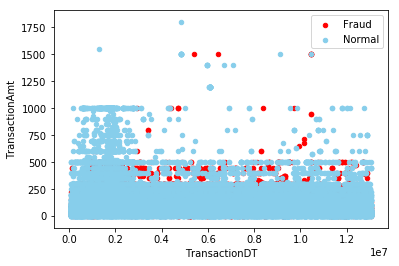

In [16]:
plt.figure(figsize=(16,9))
ax = frauds.plot.scatter(x='TransactionDT',y='TransactionAmt',color='red',label='Fraud')
non_frauds.plot.scatter(x='TransactionDT',y='TransactionAmt',color='skyblue',label='Normal',ax=ax)
plt.legend(loc='best')
plt.show()

In [17]:
print(train.head())

   TransactionID  isFraud  TransactionDT  ...  card3       card4  id_01
0        2987004        0          86506  ...  150.0  mastercard    0.0
1        2987008        0          86535  ...  150.0        visa   -5.0
2        2987010        0          86549  ...  117.0  mastercard   -5.0
3        2987011        0          86555  ...  185.0  mastercard   -5.0
4        2987016        0          86620  ...  150.0        visa    0.0

[5 rows x 10 columns]


In [0]:
ProductCD_dummy = pd.get_dummies(train['ProductCD'],prefix='ProductCD')
card4_dummy = pd.get_dummies(train['card4'],prefix='card4')

In [19]:
print(ProductCD_dummy.head())
print(card4_dummy.head())

   ProductCD_C  ProductCD_H  ProductCD_R  ProductCD_S
0            0            1            0            0
1            0            1            0            0
2            1            0            0            0
3            1            0            0            0
4            0            1            0            0
   card4_american express  card4_discover  card4_mastercard  card4_visa
0                       0               0                 1           0
1                       0               0                 0           1
2                       0               0                 1           0
3                       0               0                 1           0
4                       0               0                 0           1


In [0]:
ProductCD_dummy = ProductCD_dummy.drop('ProductCD_C',axis=1)
card4_dummy = card4_dummy.drop('card4_american express',axis=1)

In [0]:
train=train.drop(['ProductCD','card4'],axis=1)

In [0]:
train=train.join(ProductCD_dummy)
train=train.join(card4_dummy)

In [0]:
train=train.drop('TransactionID',axis=1)

In [0]:
train_new = train.dropna()

In [25]:
print(train_new.head())

   isFraud  TransactionDT  ...  card4_mastercard  card4_visa
0        0          86506  ...                 1           0
1        0          86535  ...                 0           1
2        0          86549  ...                 1           0
3        0          86555  ...                 1           0
4        0          86620  ...                 0           1

[5 rows x 13 columns]


In [0]:
x= train_new.drop('isFraud',axis=1)
y= train_new['isFraud']

In [0]:
from sklearn.model_selection import train_test_split

*Logistics* Regression Part

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [0]:
from sklearn import linear_model

In [33]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

print results

In [35]:
print('Score',logistic.score(x_test,y_test))

Score 0.9260720227553265
